# Global Power Plant Database

Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset is contains of 907 rows and 27 columns including 2 target varibales 1-----------> capacity_mw and 
2 --------->primary_fuel(Fuel_Type)
where we need to predict both capacity_mw and Fuel Type.

In [3]:
# our target variable is fuel type thats why for understanding purpose we rename the column name
df.rename(columns={'primary_fuel':'fuel_type'},inplace = True)

# Exploratory Data Analysis(EDA)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
fuel_type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

we observe that Here there are two types of data namely 
1-> object type and 2-> float64 data type

In [5]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   fuel_type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'fuel_type',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [7]:
# lets check null value present in the dataset.
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
fuel_type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

So this indicates that  there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

In [8]:
df.isnull().sum().sum()

10445

this value shows how many null value present in all the dataset.

In [9]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
fuel_type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [10]:
# checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

we notice that each power plant has its own name and it will not help us  for the prediction.

we see that generation_gwh_2013 and generation 2019 also has 0% null value in this  column 0 data is present. we must have to drop this column.

In [11]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

this also all unique value means identity of each plant. so it will also not help us.

lets drop irrelevent columns together.

there ia only 1 unique value present in the  'generation_data_source'. we musthve to remove it.

In [12]:
df.drop(columns=['country','country_long','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','gppd_idnr','name',
                 'url','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019','owner','generation_data_source'],axis=1,inplace = True)

In [13]:
df.columns.to_list()

['capacity_mw',
 'latitude',
 'longitude',
 'fuel_type',
 'other_fuel1',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

for the heatmap we must required to instll a neccesary library.

<AxesSubplot:>

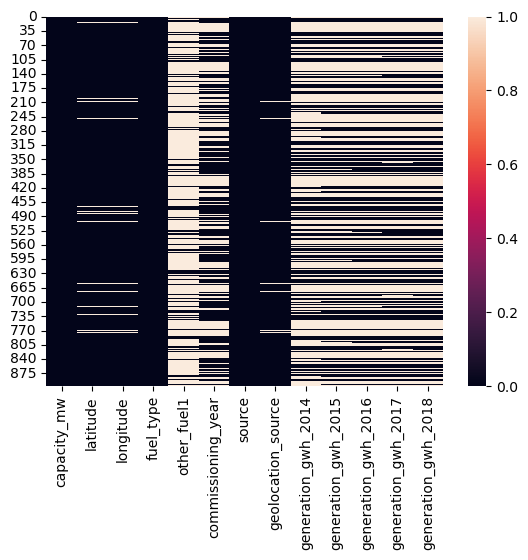

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

this heatmap indicates the missing value which present in the dataset.

no.of unique values

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: fuel_type, dtype: int64


Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: i

there is no wide space is present in our dataset. only for indentation we use wide space.

In [16]:
df['fuel_type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: fuel_type, dtype: int64

# Treating null values using imputation technique

In [17]:
# let's check the mean of the latitude
df['latitude'].mean() 

21.19791811846691

In [18]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [19]:
   # let's check the mode of geolocation_source column
df['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

In [20]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode() 

0    Oil
Name: other_fuel1, dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns .Let's fill the null values of categorical columns by their respective modes.

In [21]:
# Replacing the null value by its mode Oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

_ The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method

In [22]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median()) 

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
iter_impute = IterativeImputer()
iter_impute = pd.DataFrame(iter_impute.fit_transform(df[['generation_gwh_2014','generation_gwh_2015']]),
               columns = ['generation_gwh_2014','generation_gwh_2015'])
iter_impute

,generation_gwh_2014,generation_gwh_2015
0,801.123775,850.869880
1,801.123775,850.869880
2,801.123775,850.869880
3,617.789264,843.747000
4,3035.550000,5916.370000
...,...,...
902,801.123775,0.994875
903,801.123775,850.869880
904,801.123775,850.869880
905,801.123775,850.869880


In [25]:
iter_impute.isnull()['generation_gwh_2015'].sum()

0

In [26]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

<AxesSubplot:>

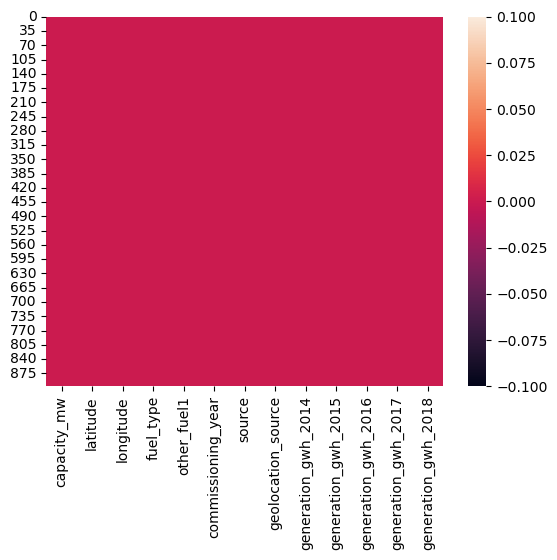

In [27]:
sns.heatmap(df.isnull())

no missing value present in the dataset.

no missing value present in the dataset right now.
our data is witout the null values.

In [28]:
# let's extract power plant age from commissioning year by subtraction it from the year 2023
df['Power_plant_age'] = 2023 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [29]:
df.head()

,capacity_mw,latitude,longitude,fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,12.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,19.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,8.0


In [30]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
fuel_type              0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

In [31]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,24.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,22.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,25.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,96.000000


Above cell gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present.
Observation :-

1.The counts of columns are same which means there are no missing values present in the dataset.
2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
3.The median is bit greate than the mean in the column latitude which means it is skewed to left.
4.From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.
5.The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.

So before visualizing the data, let's Separate categorical and numerical columns

# Seperating Numerical and categorical columns.

In [32]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns : ', categorical_col)

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
        
print('Numerical columns : ', numerical_col)        

categorical columns :  ['fuel_type', 'other_fuel1', 'source', 'geolocation_source']
Numerical columns :  ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


In [33]:
df['fuel_type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [34]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

# DATA VISUALIZATION

Univariate Analysis




Plotting categorical columns

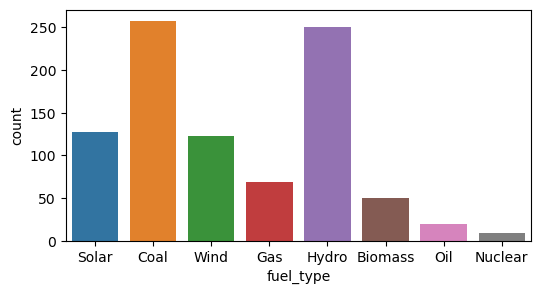

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: fuel_type, dtype: int64


In [35]:
plt.figure(figsize=(6,3))
ax = sns.countplot(df['fuel_type'])
plt.show()
print(df['fuel_type'].value_counts())

The graph clearly shows that, coal has particepating more in power generation as compared to other fuel type.
this is our target variable so it should not be biased.


The Data is not balanced so will balance the data later.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


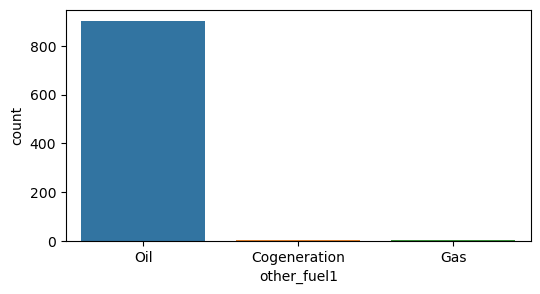

In [36]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize = (6,3))
ax =  sns.countplot(df['other_fuel1'])

oil has contributing more as compared to gas and cogeneration

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


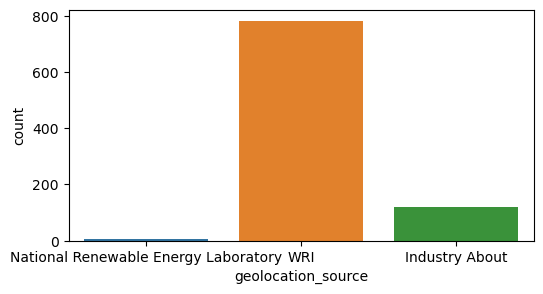

In [37]:
print(df['geolocation_source'].value_counts())
plt.figure(figsize = (6,3))
ax = sns.countplot(df['geolocation_source'])
plt.show()


As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


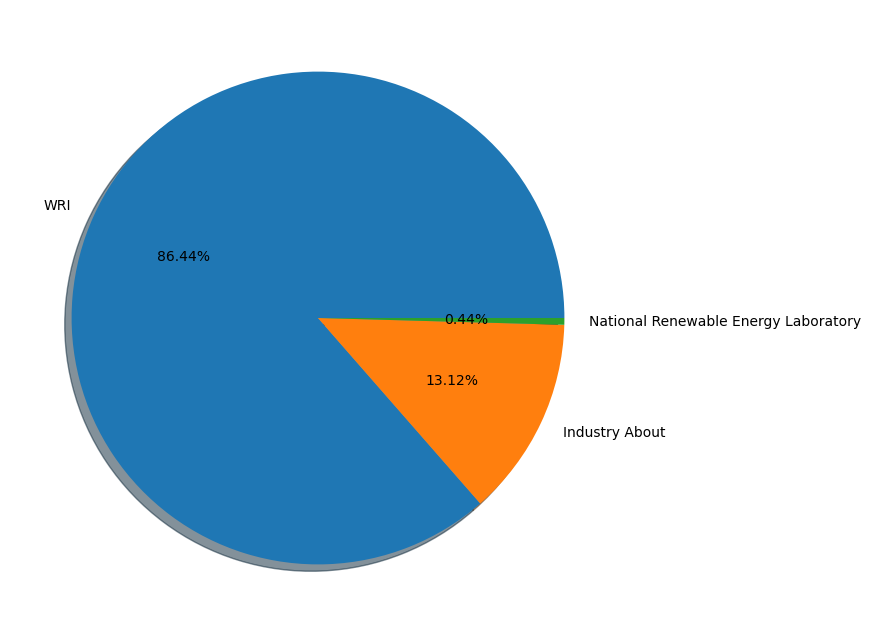

In [38]:
#Visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


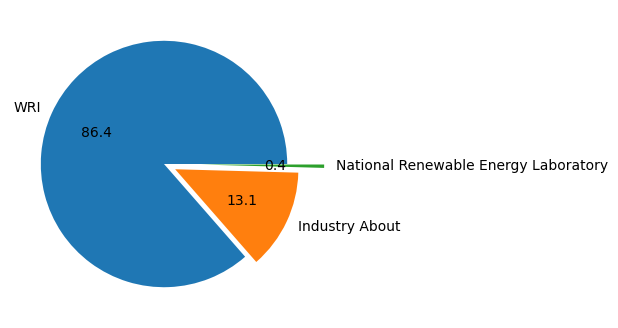

In [39]:
print(df['geolocation_source'].value_counts())
labels = 'WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize = (4,4))
plt.pie(df['geolocation_source'].value_counts(), labels = labels, explode = [0,0.1,0.3], autopct = '%1.1f')
plt.show()

As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geo-location information compare to other two sources.

In [40]:
#Lets check the data hsa been distributed in remaining columns.

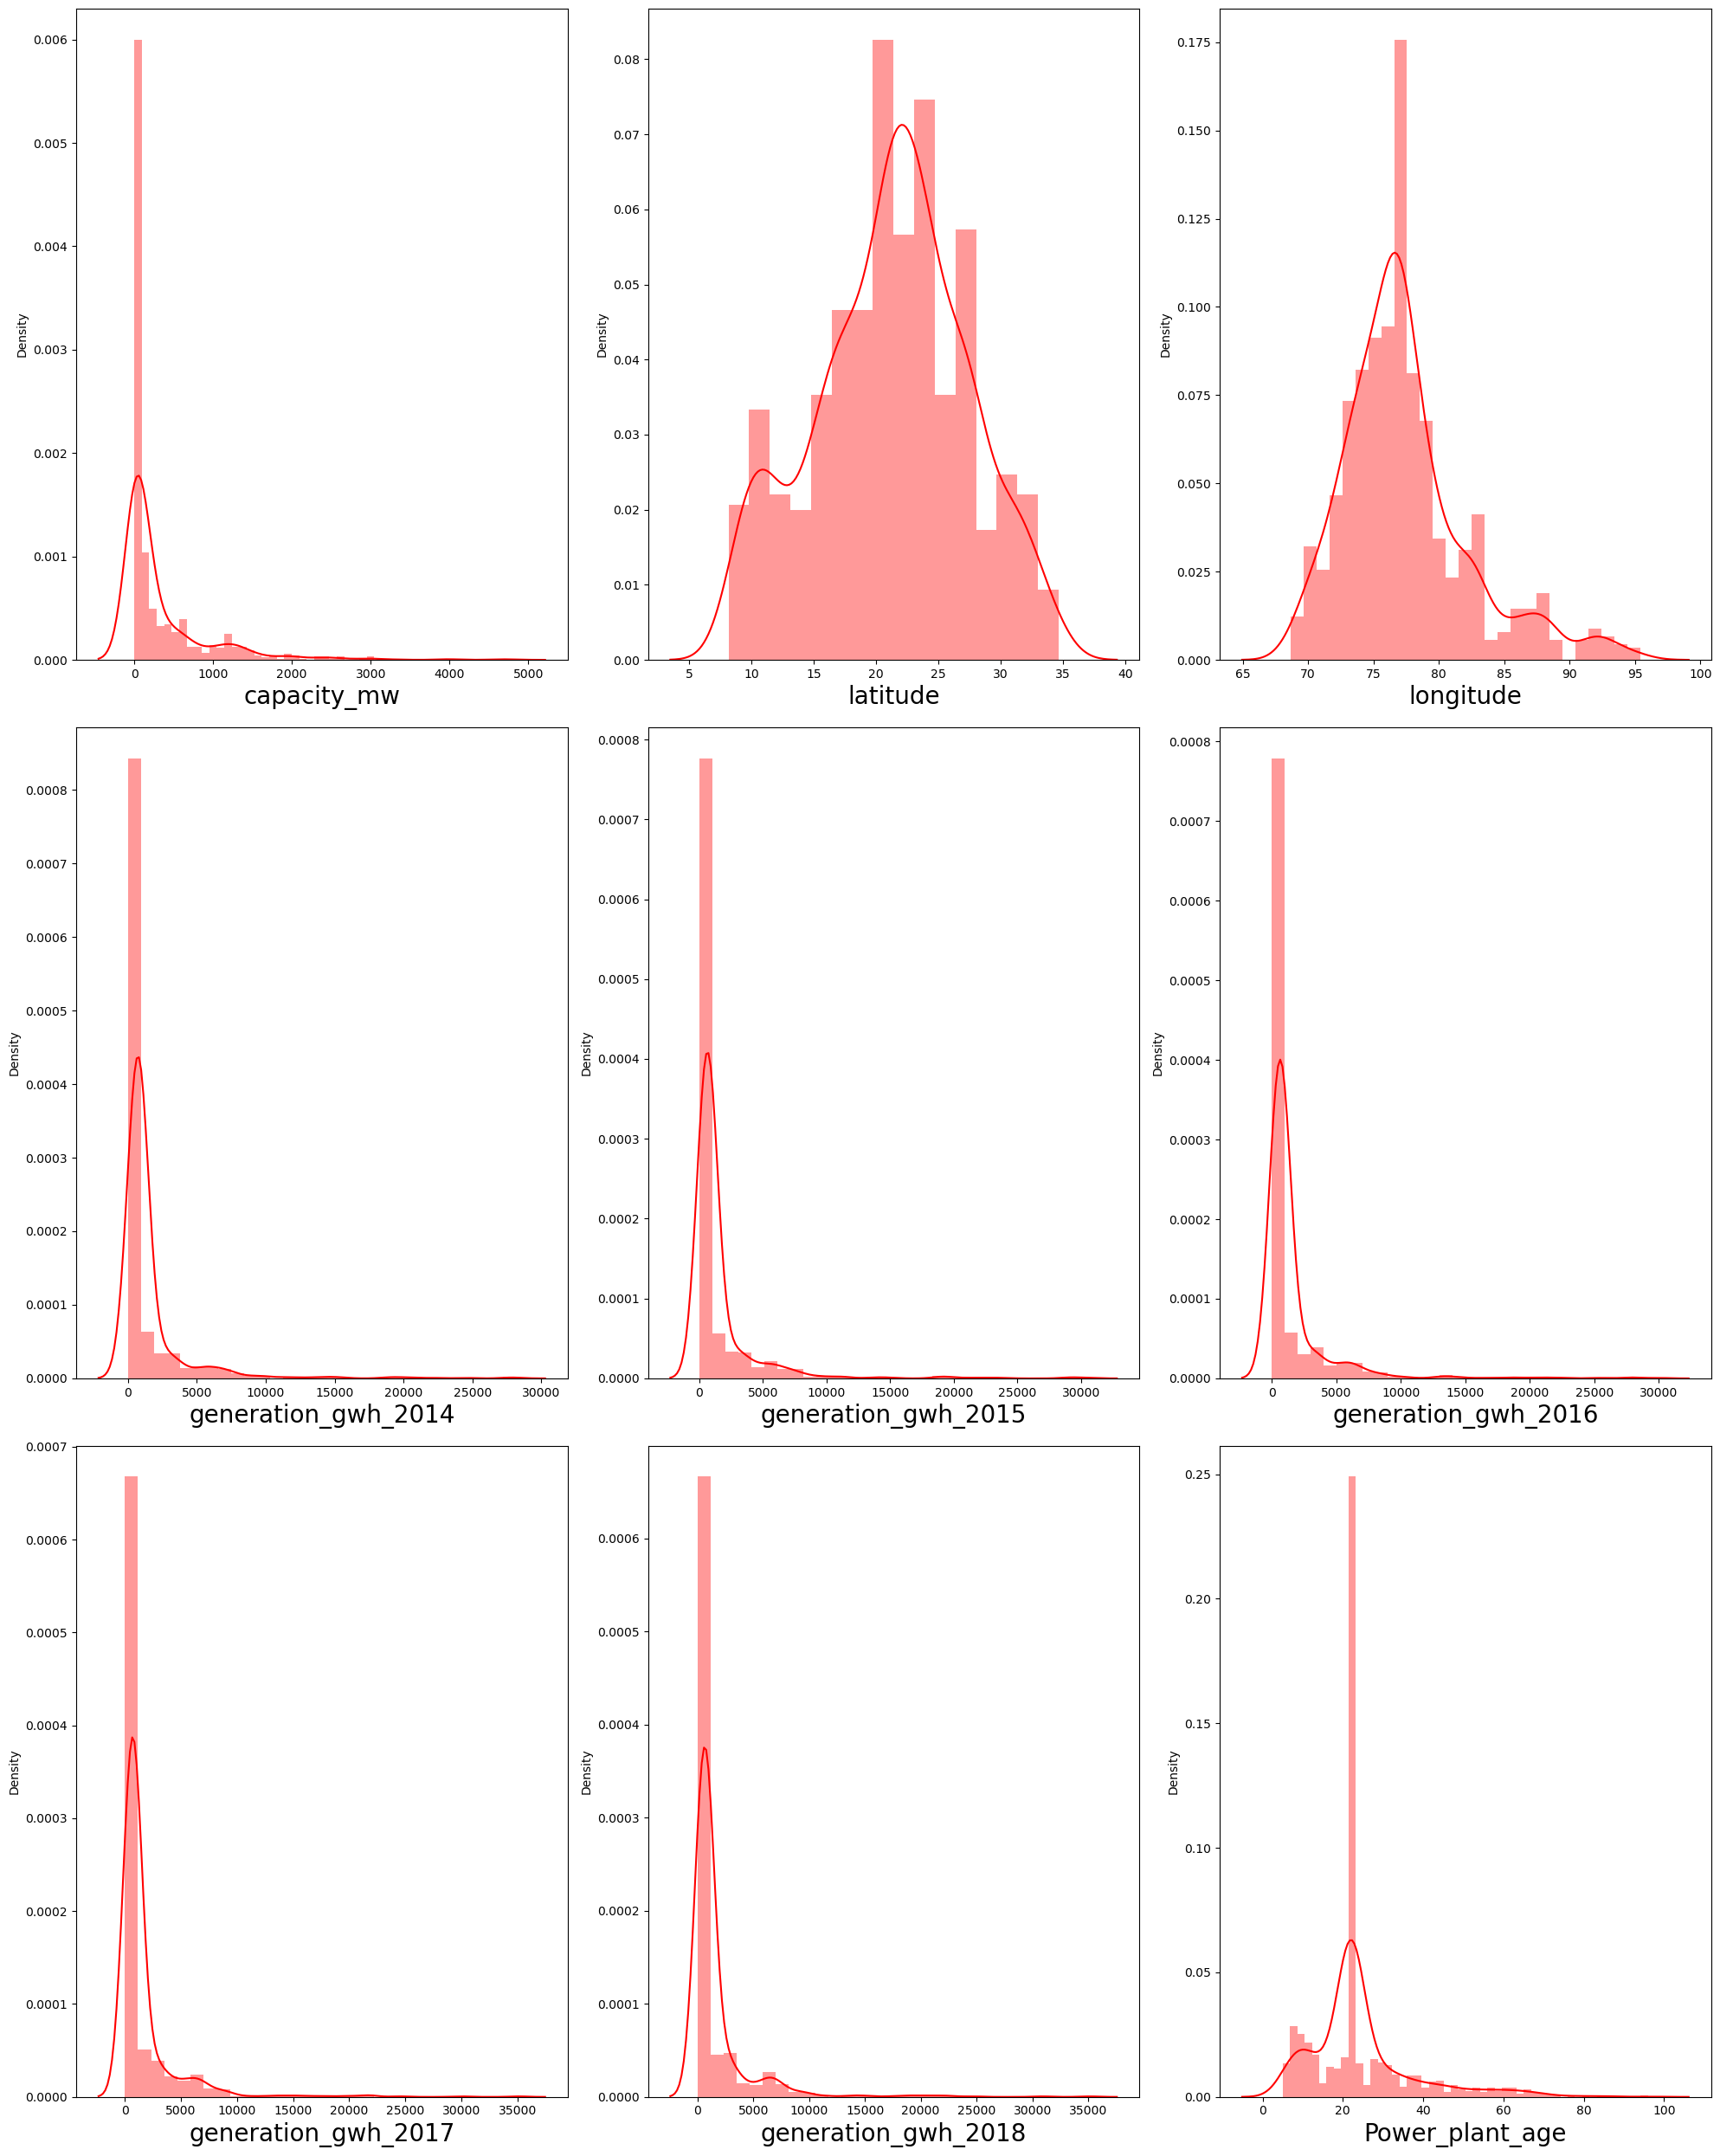

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

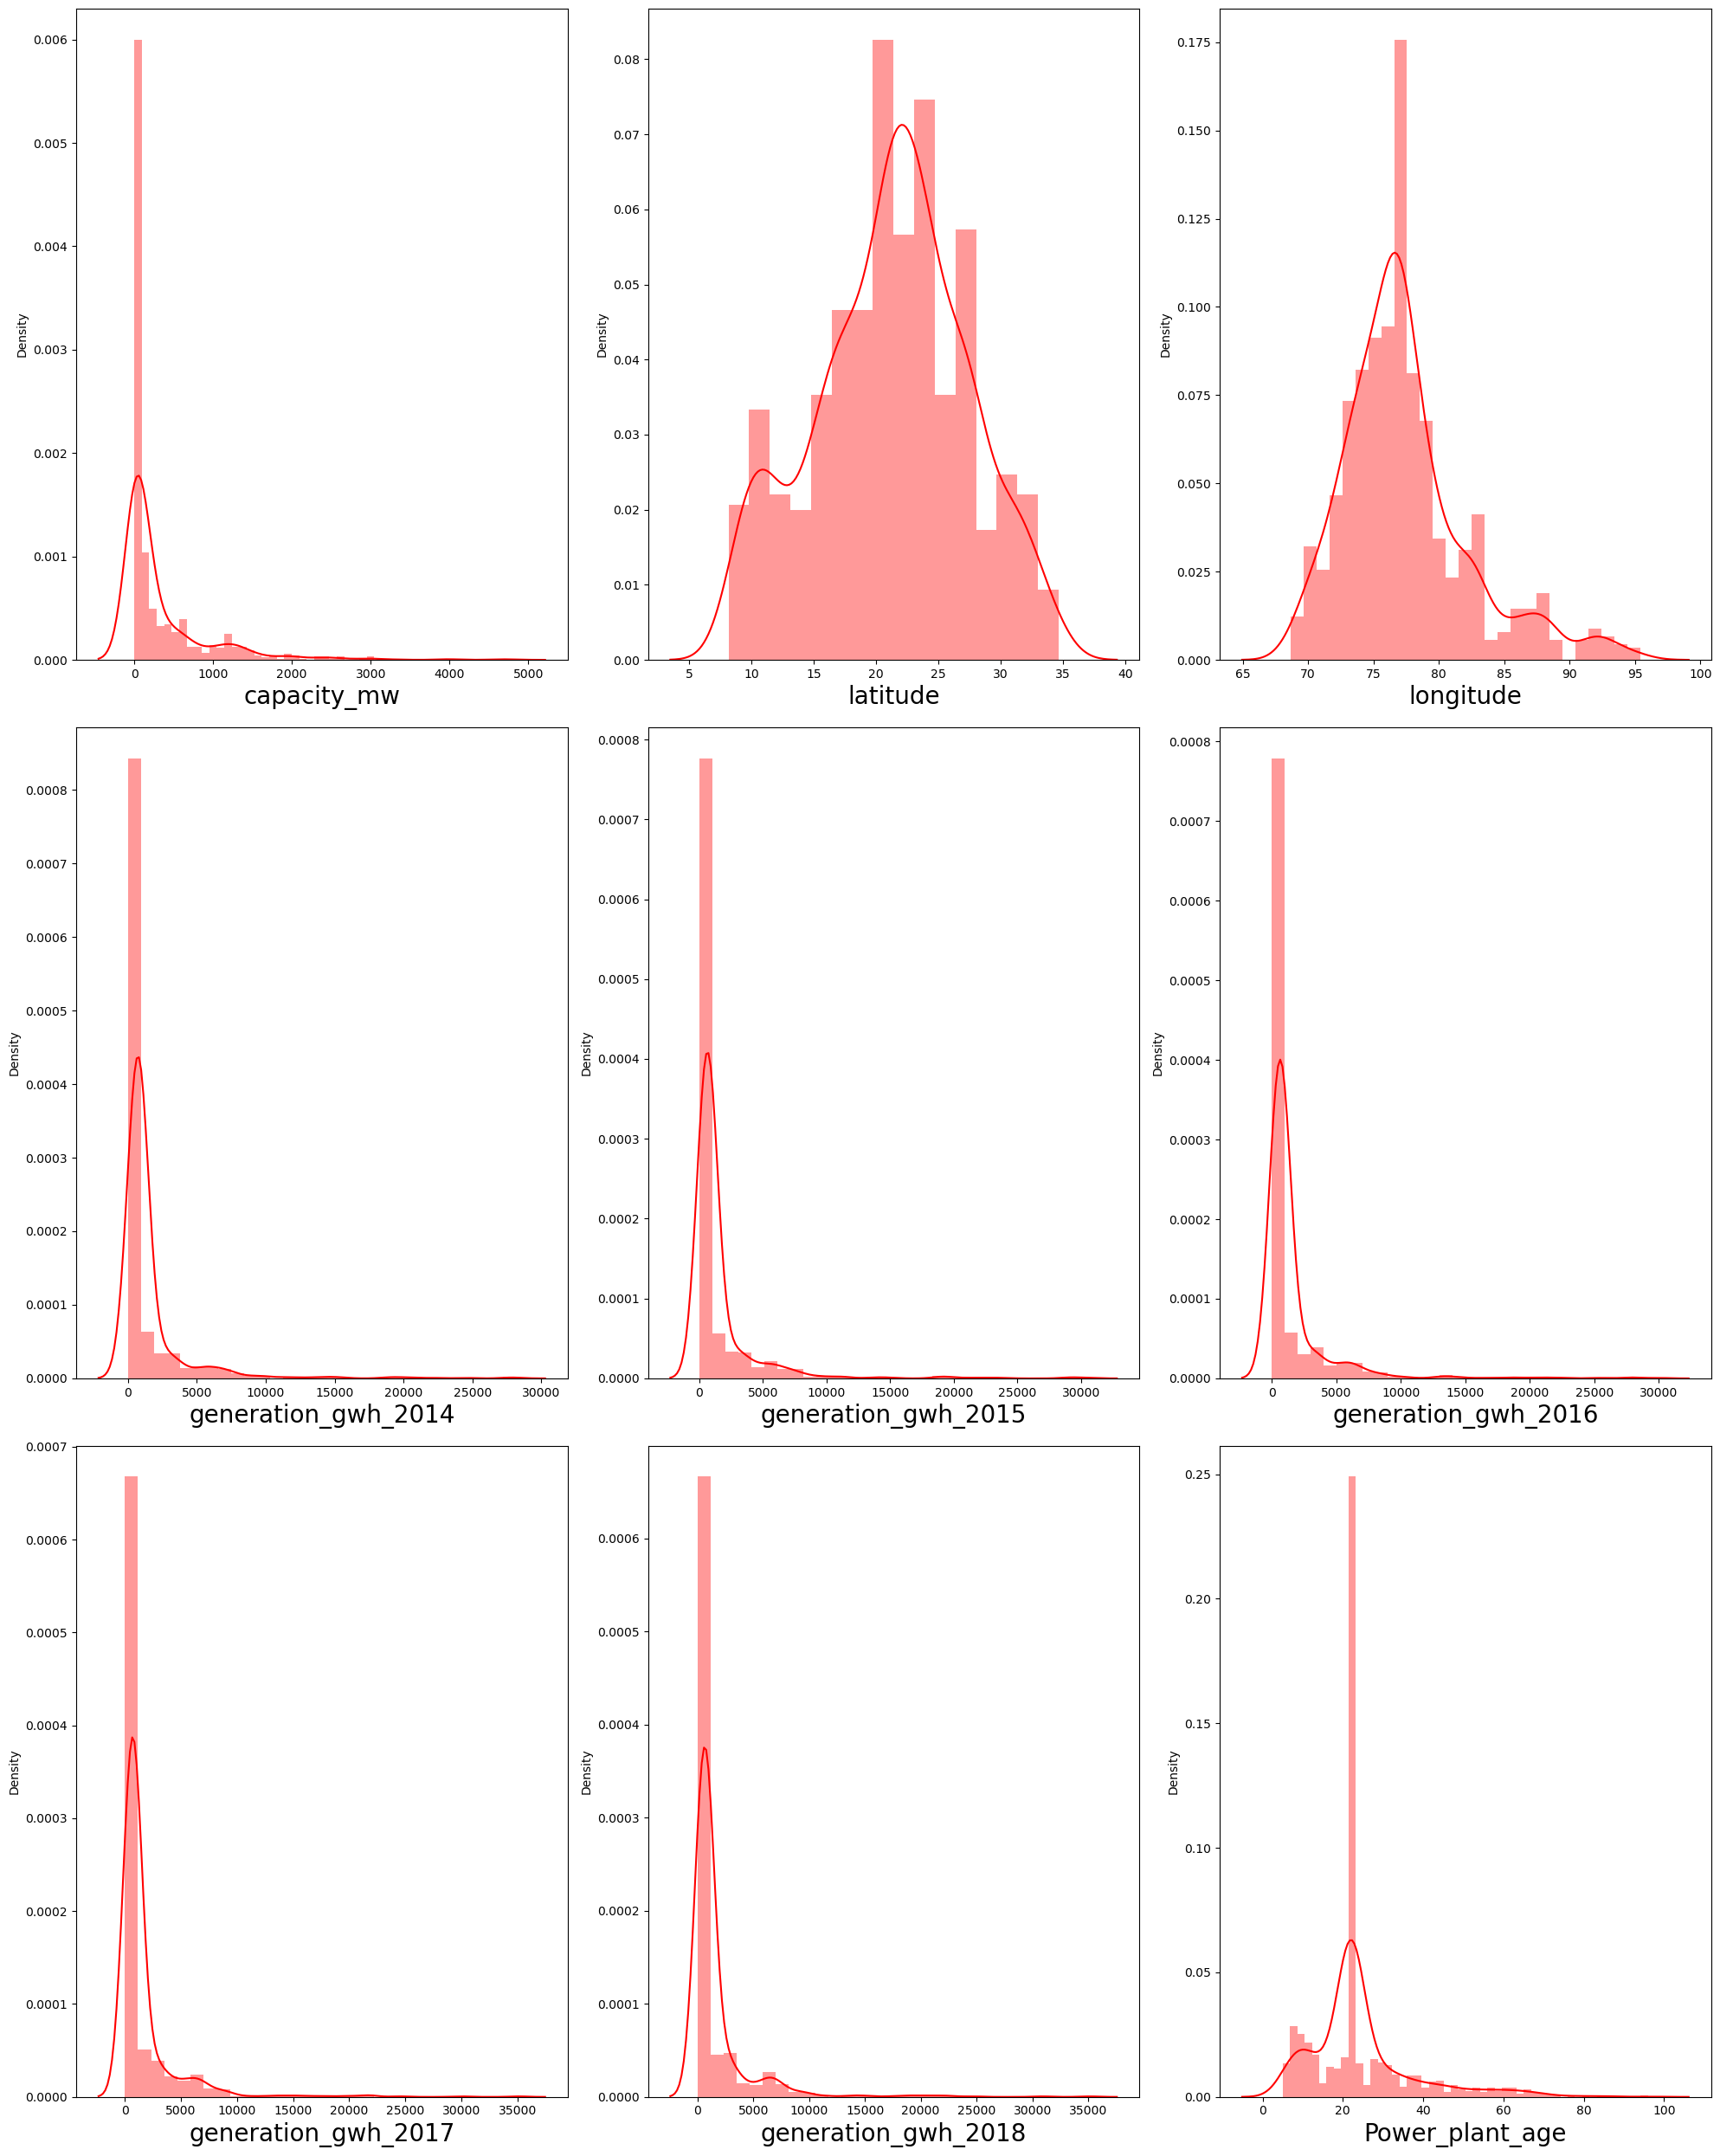

In [42]:
plt.figure(figsize = (20,25), facecolor  = 'white')
graph = 1
for i in numerical_col:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize = 20)
    graph+=1
plt.tight_layout()    
    

Observation :-

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the coluns except the label in the later part.

# Bivariate Analysis

Comparing target varibale capacity_mw with features

<AxesSubplot:title={'center':'comparision between power planr age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

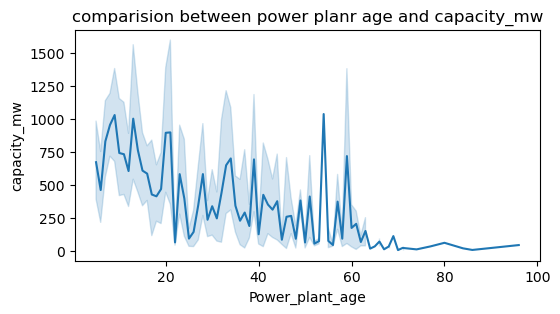

In [43]:
# lets check the power plant age affect the cpacity of the power plant
plt.figure(figsize=(6,3))
plt.title('comparision between power planr age and capacity_mw')
sns.lineplot(df['Power_plant_age'],df['capacity_mw'])

we can observe that from the chart, the capacity of older power plants is very less compared to the power plants which are started recently

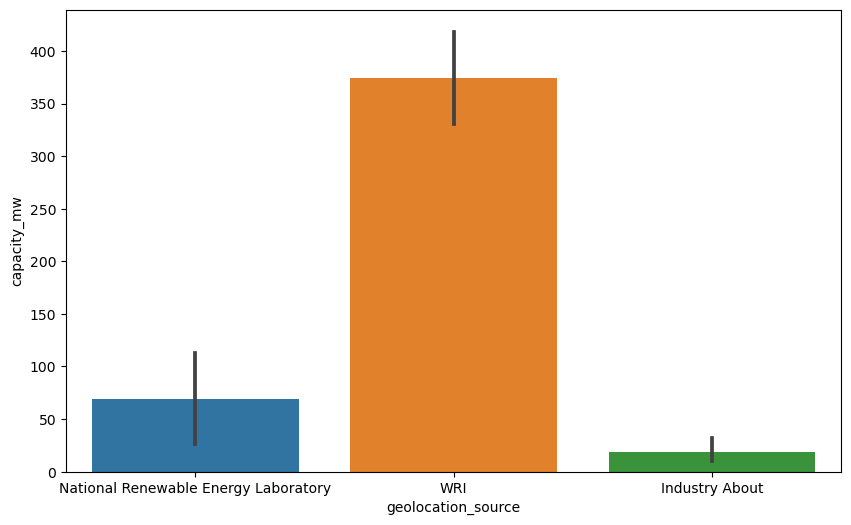

In [44]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

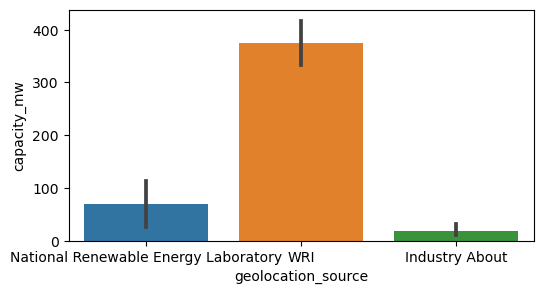

In [45]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (6,3))
sns.barplot(df['geolocation_source'], df['capacity_mw'])
plt.show()

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

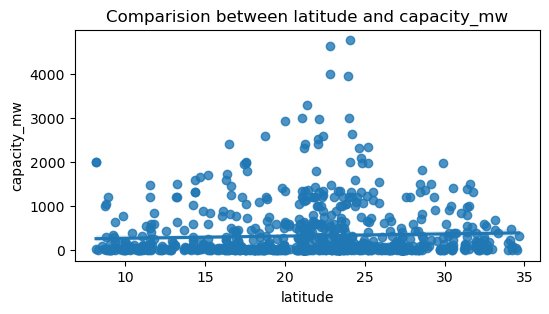

In [46]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[6,3])
plt.title('Comparision between latitude and capacity_mw')
sns.regplot(df['latitude'],df['capacity_mw'])


There is no linear realtionship is between mw and latitute .plot also shows the outliers present in the dataset

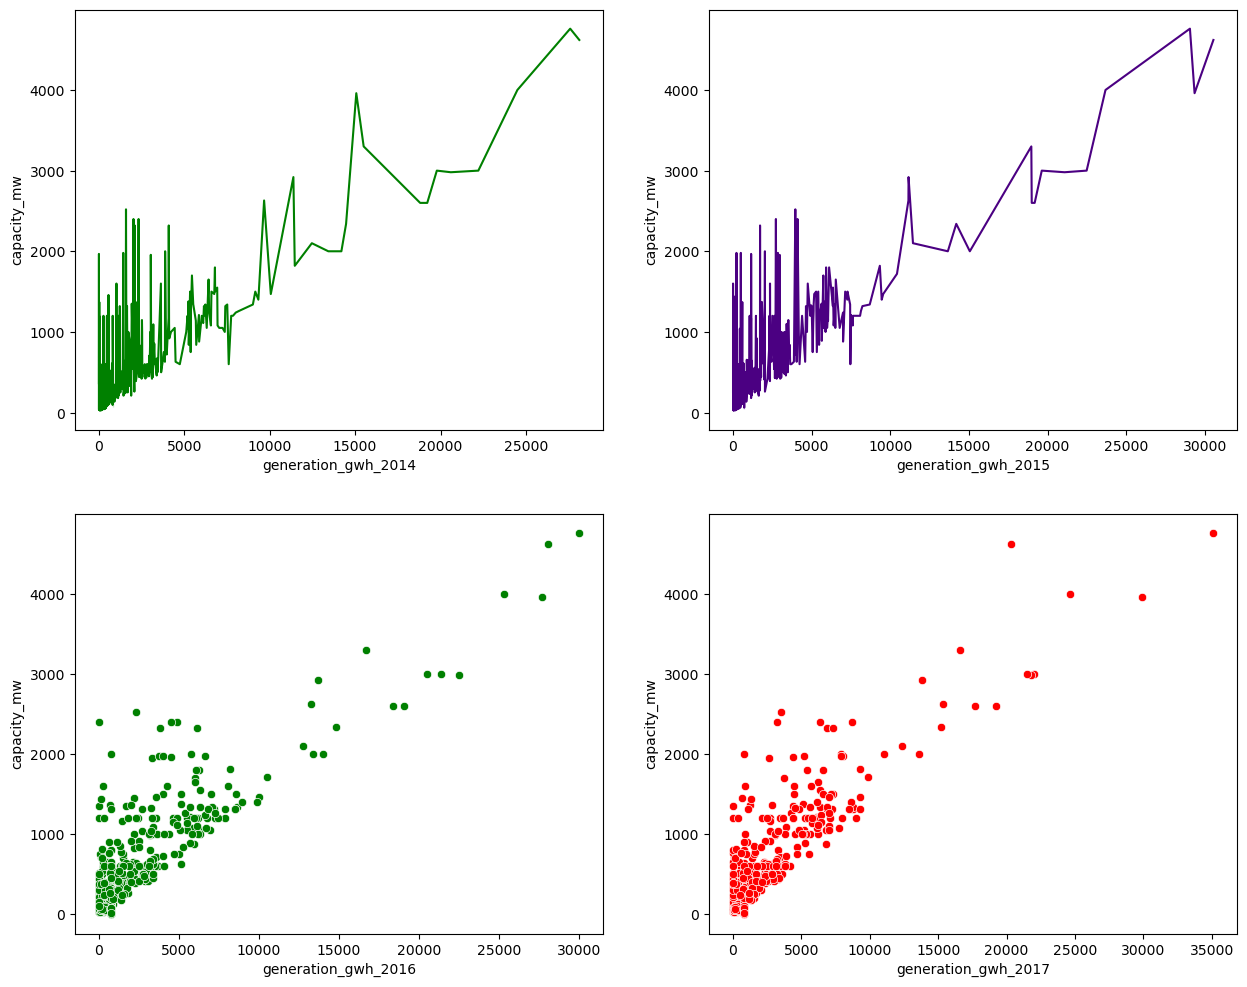

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

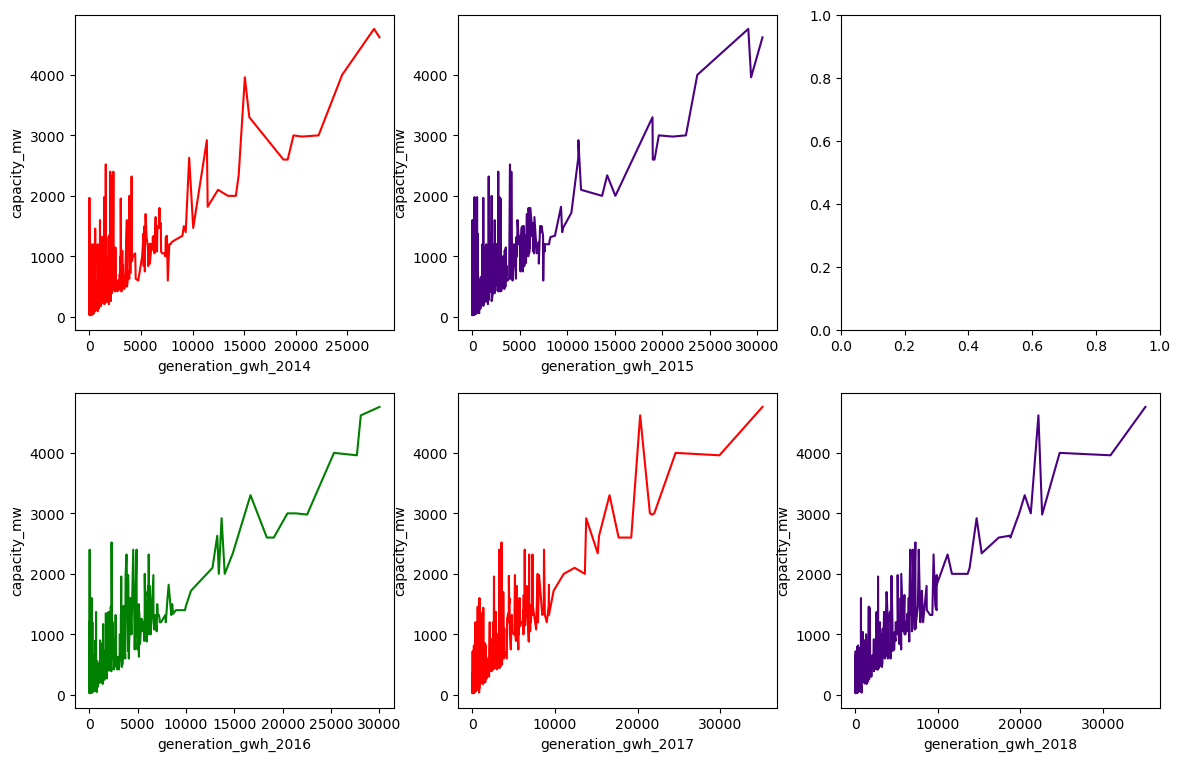

In [48]:
fig,axes  =plt.subplots(2,3,figsize = (14,9))

sns.lineplot (x = 'generation_gwh_2014',y = 'capacity_mw',ax = axes[0,0],data = df, color = 'r')
sns.lineplot (x = 'generation_gwh_2015',y = 'capacity_mw',ax = axes[0,1],data = df, color = 'indigo')
sns.lineplot  (x = 'generation_gwh_2016',y = 'capacity_mw',ax = axes[1,0],data = df, color = 'g')
sns.lineplot  (x = 'generation_gwh_2017',y = 'capacity_mw',ax = axes[1,1],data = df, color = 'r')
sns.lineplot (x = 'generation_gwh_2018',y = 'capacity_mw',ax = axes[1,2],data = df, color = 'indigo')

Observation :-

- There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017,2018 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately

# Comparing the target variable Fuel Types with other features

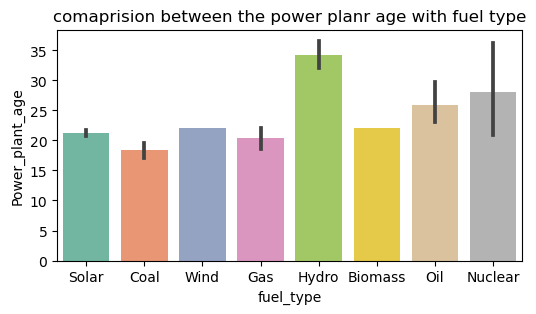

In [49]:
# lets check how the power plant age affect the fuel type
plt.figure(figsize = (6,3))
plt.title('comaprision between the power planr age with fuel type')

sns.barplot(x ='fuel_type', y ='Power_plant_age', data = df, palette = 'Set2')
plt.show()

From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
The power plants which are recently constructed uses Solar, Biomass, Coal and Gas to gererate the power

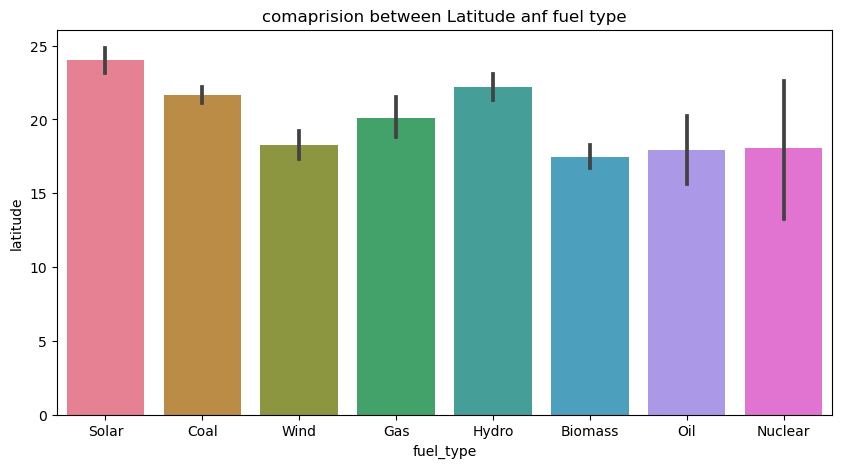

In [50]:
# letc check the how the fuel type is related to latitude of the powerplant
plt.figure(figsize = (10,5))
plt.title('comaprision between Latitude anf fuel type')
sns.barplot(df['fuel_type'],df['latitude'], palette = 'husl')
plt.show()


So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

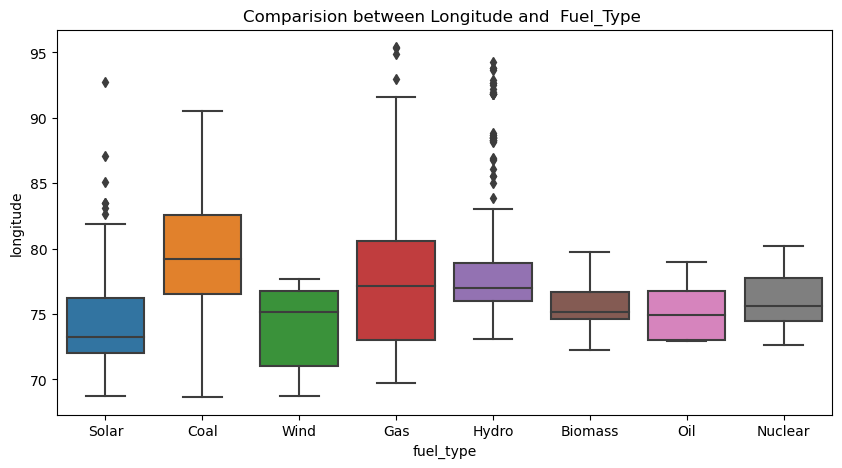

In [51]:
# Lets check how the fuel type is related to longitude of the power plant 
plt.figure(figsize = (10,5))
plt.title("Comparision between Longitude and  Fuel_Type ")
sns.boxplot(df['fuel_type'],df['longitude'])
plt.show()

The fuel type Gas has high longitude followed by Hydro , Solar and Coal other fuel types have very less longitude

<AxesSubplot:xlabel='fuel_type', ylabel='generation_gwh_2018'>

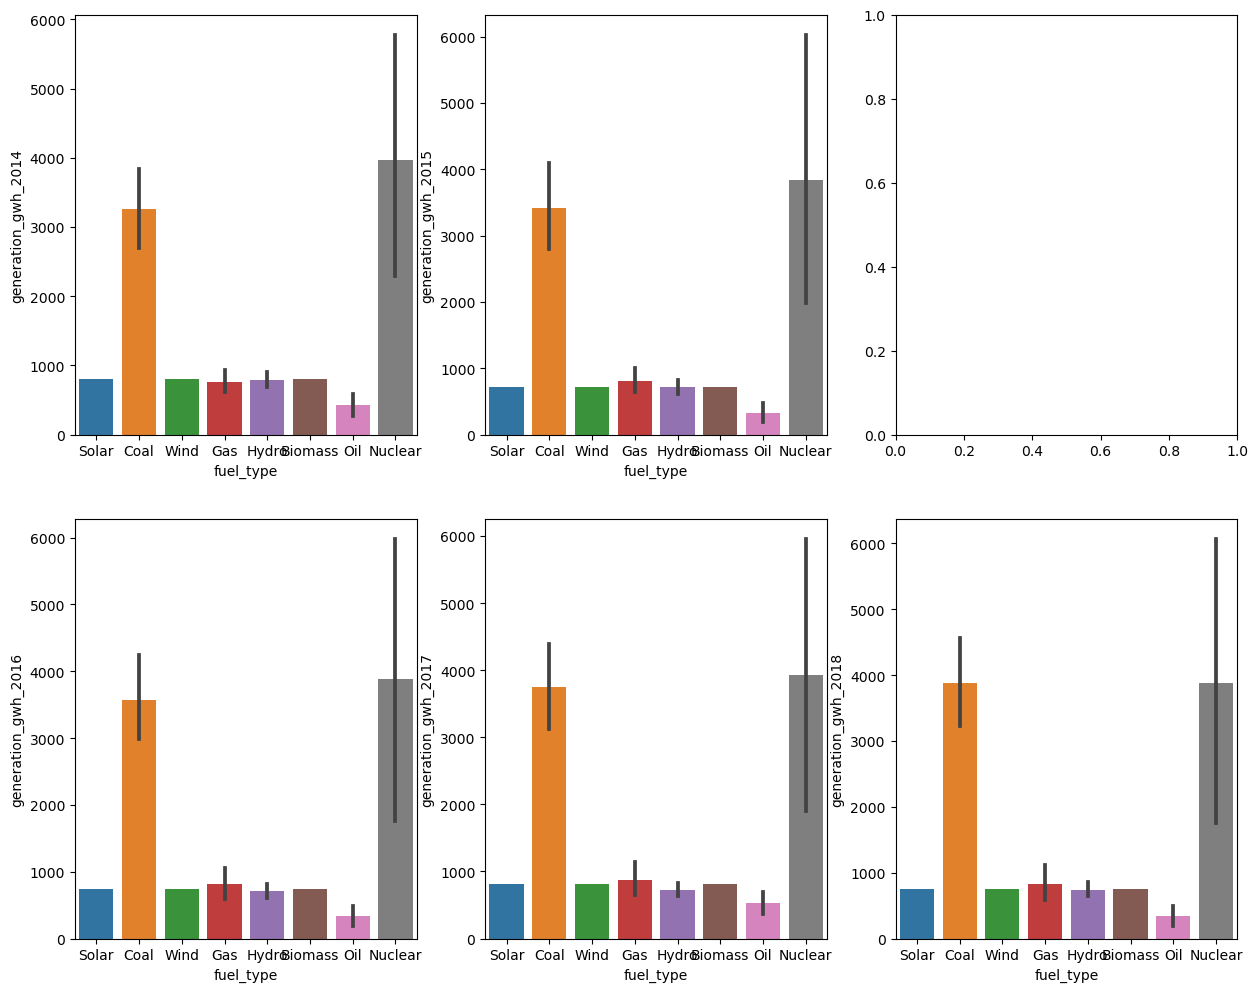

In [52]:
fig,axes = plt.subplots(2,3,figsize = (15,12))
sns.barplot(x='fuel_type', y='generation_gwh_2014', ax = axes[0,0],data=df)
sns.barplot(x='fuel_type', y='generation_gwh_2015', ax = axes[0,1],data=df)
sns.barplot(x='fuel_type', y='generation_gwh_2016', ax = axes[1,0],data=df)
sns.barplot(x='fuel_type', y='generation_gwh_2017', ax = axes[1,1],data=df)
sns.barplot(x='fuel_type', y='generation_gwh_2018', ax = axes[1,2],data=df)


From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
Other fuel types have very less power generation reports

# Checking the relation between targets variables

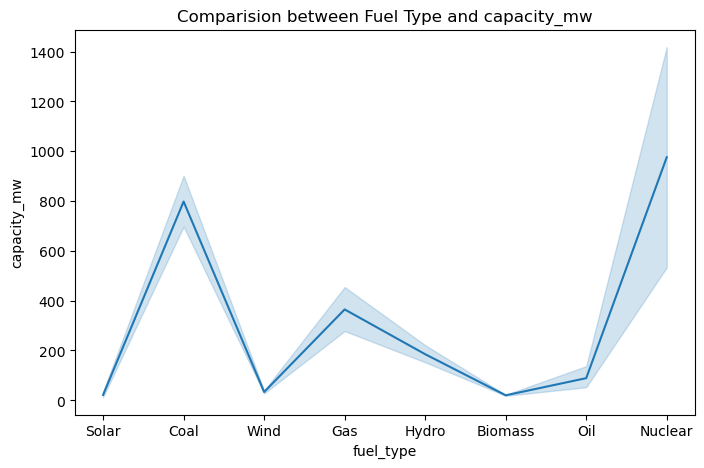

In [53]:
# let's check the relation between ourtarget varibale fuel type and capacity_mw
plt.figure(figsize=(8,5))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.lineplot(x= 'fuel_type',y = 'capacity_mw',data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants

# Multivariate Analysis

In [54]:
# checking the pairwise realtion between the featurea AND LABLES in megawatt
#sns.pairplot(df,palette = 'husl',hue ='fuel_type')

# Outliers Handling

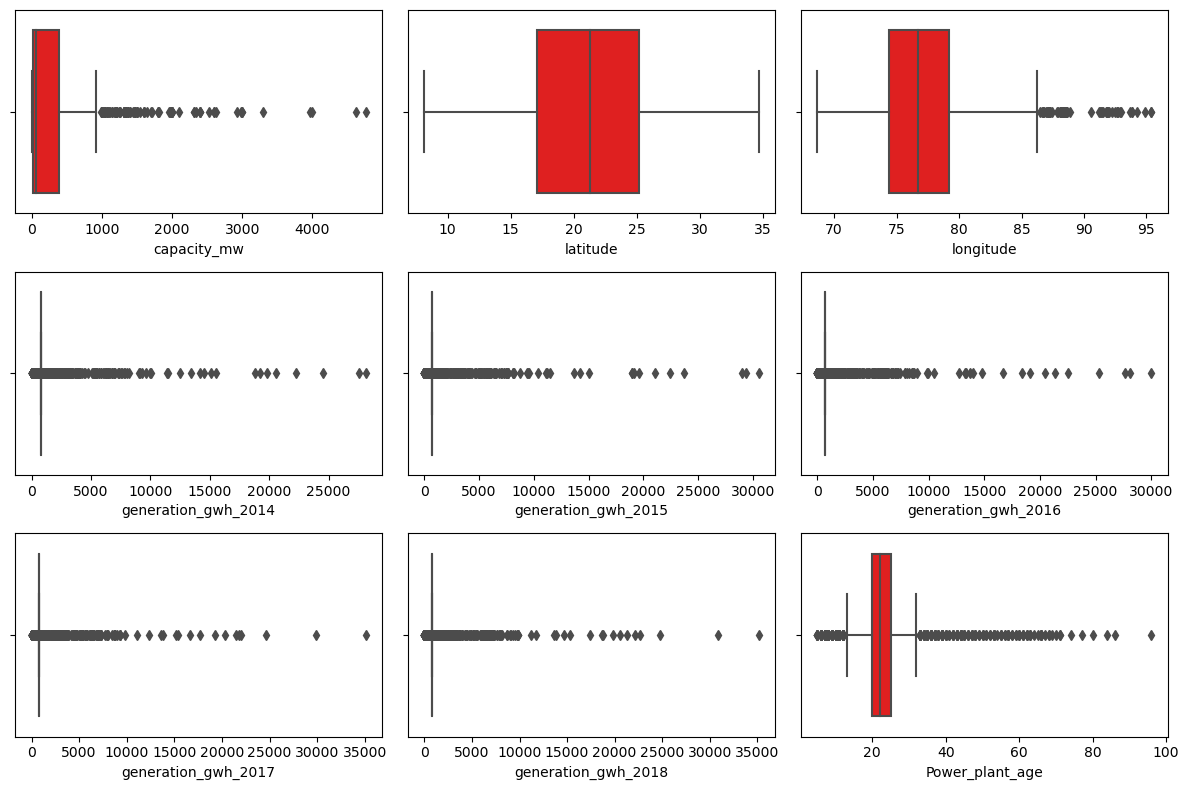

In [55]:
plt.figure(figsize = (12,8))
graph = 1
for column in numerical_col:
    if graph <=9:
        ax= plt.subplot(3,3,graph)
        sns.boxplot(df[column],color = 'r')
        plt.xlabel(column,fontsize=10)
    graph +=1 
plt.tight_layout()    

In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
Let's remove outliers using ZSCORE method

# Removing Outliers

In [56]:
# features containing outliers
features = df[['longitude','Power_plant_age',
               'generation_gwh_2014',
               'generation_gwh_2015',
               'generation_gwh_2016',
               'generation_gwh_2017',
               'generation_gwh_2018']]

In [57]:
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,Power_plant_age,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.869917,0.933076,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.585590,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
2,1.673567,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
3,2.895239,0.400812,0.322873,0.223348,0.226194,0.326203,0.327990
4,1.035238,1.237227,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...,...
902,0.014609,1.313265,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.153415,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.383592,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.764564,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394


In [58]:
# lets use zscore to remove outliers
from scipy.stats import zscore
z= np.abs(zscore(features))
z

,longitude,Power_plant_age,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.869917,0.933076,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.585590,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
2,1.673567,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
3,2.895239,0.400812,0.322873,0.223348,0.226194,0.326203,0.327990
4,1.035238,1.237227,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...,...
902,0.014609,1.313265,0.257022,0.505833,0.443415,0.259992,0.308963
903,0.153415,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.383592,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.764564,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394


So here we have removed the outliers

In [59]:
np.where(z>3)

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 219, 222, 244, 308, 308, 308, 308, 308, 323,
        333, 340, 342, 360, 364, 364, 364, 364, 364, 371, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 494, 494, 494, 494,
        494, 499, 519, 532, 538, 541, 546, 573, 577, 583, 592, 601, 621,
        623, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
        695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 721, 724, 724,
        724, 724, 724, 726, 726, 726, 726, 726, 728, 786, 786, 786, 786,
        786, 807, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880, 880,
        880, 880], dtype=int64),
 array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 0, 0, 2, 3, 4, 5, 6, 1, 1, 0, 2, 3,
        4, 5, 6, 0, 0, 0, 1, 0, 2, 3, 4, 5, 6, 1, 0, 0, 1, 1, 1, 6, 1, 2,
        3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2,
        0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 5,
        6, 2, 

In [60]:
z.iloc[880,6]

10.56840855289652

In [61]:
# creating new dataframe

df1= df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,12.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,19.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,7.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,22.0


SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3

In [62]:
df.shape

(907, 13)

In [63]:
df1.shape

(851, 13)

In [64]:
data_loss = ((907-851)/907)*100
data_loss

6.174200661521499

Here We are losing only 6% of data by removing outliers using zscore.


Then remove the outliers and check data loss % by using IQR method

# IQR METHOD(Inter Quantile Range)

In [65]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

IQR = Q3-Q1

df2 = df[~((df <(Q1-1.5* IQR))| (df > (Q3 + 1.5* IQR))).any(axis=1)]

In [66]:
df2.shape

(420, 13)

In [67]:
dataloss_2 = ((907-420)/907)*100
dataloss_2

53.69349503858876

We can observe here that using IQR method we are losing 53% of data which is huge. so considering zscore method for better result

Encoding the categorical columns using Label Encoding

In [68]:
categorical_col = ['fuel_type', 'other_fuel1','source','geolocation_source']

In [69]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1[categorical_col] = df1[categorical_col].apply(LE.fit_transform)

In [70]:
df1[categorical_col]

,fuel_type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


SO here encoding the categorical columns using label encoder

# Correlation between the target variable and features using HEAT MAP

In [71]:
corr=df1.corr()
corr

,capacity_mw,latitude,longitude,fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
fuel_type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


<AxesSubplot:>

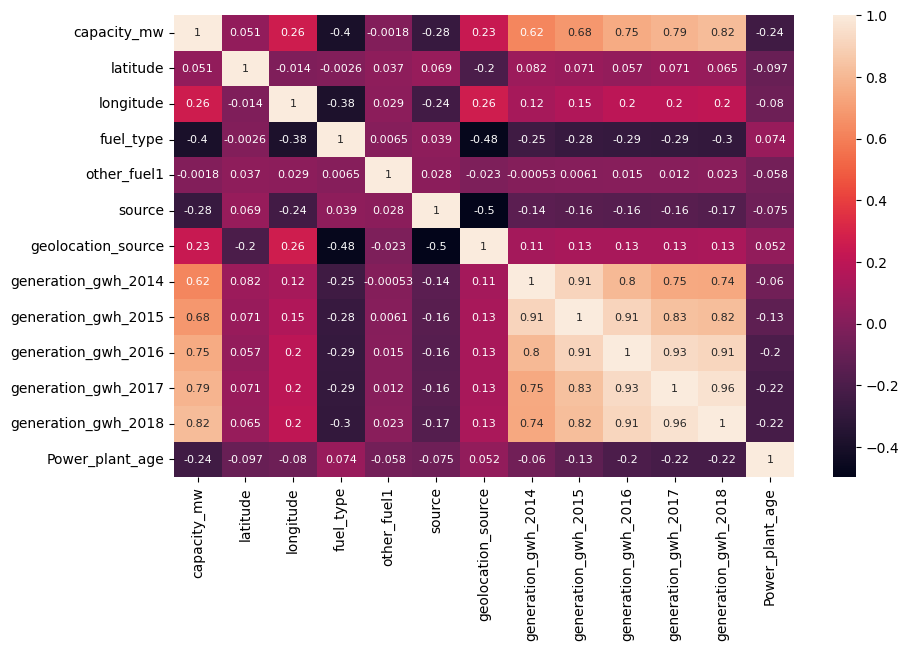

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),fmt='.2g', annot = True, linecolor='black',annot_kws={'size':8})

This heatmap Shows the correlation matrix by visualizing the data .

We can observe the relation between feature to feature and feature to label.
This heat map contains both positive and negative correlation.
Correlation between capacity_mw and features

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014 , generation_gwh_2018.
& the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.
Correlation between Fuel_Type and features

The label Fuel_Type is less correlate with Power_plant_age and source
The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years
From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.
Also the features other_fuel1 and latitude have very less correlation with both the labels . Let's drop those columns.

# Visualizing the correlation between label and features using bar plot

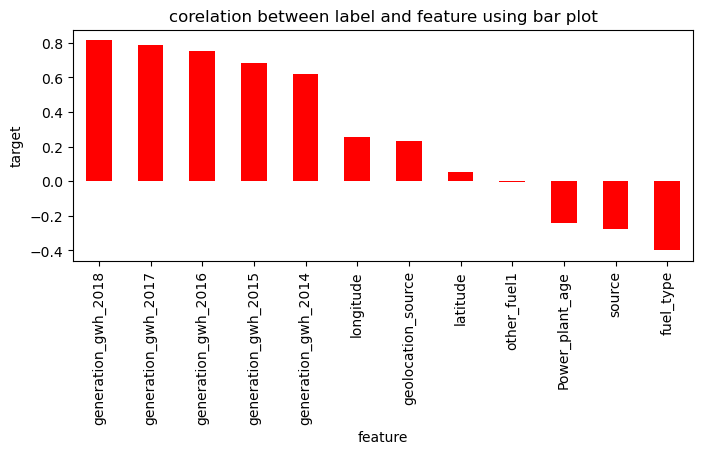

In [73]:
plt.figure(figsize=(8,3))
df1.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'r')
plt.xlabel('feature', fontsize = 10)
plt.ylabel('target', fontsize = 10)
plt.title('corelation between label and feature using bar plot')
plt.show()

This is the bar plot to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label

# corealtion with 2nd Target variable

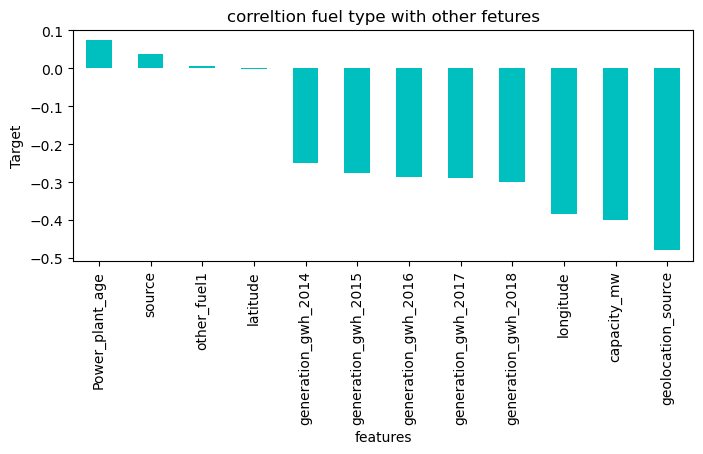

In [74]:
plt.figure(figsize = (8,3))
df1.corr()['fuel_type'].sort_values(ascending = False).drop(['fuel_type']).plot(kind = 'bar',color = 'c')
plt.xlabel('features', size = 10)
plt.ylabel('Target', size = 10)
plt.title('correltion fuel type with other fetures')
plt.show()

we can observe that:-

the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type.

In [75]:
# dropping the irrelavent colunmns
df1.drop(['other_fuel1','latitude'] ,axis=1,inplace=True)
df1


,capacity_mw,longitude,fuel_type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,12.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,19.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,77.3568,1,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,7.0
903,3.0,78.1654,6,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
904,25.5,75.5811,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,22.0
905,80.0,73.7477,1,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,22.0


# Prediction for our 1st target varibale [capacity_mw]

In [76]:
# seperating feature and label
x = df1.drop('capacity_mw',axis = 1)
y = df1['capacity_mw']

In [77]:
y.shape

(851,)

In [78]:
x.shape

(851, 10)

In [79]:
# checking skewness
x.skew()

longitude              0.945877
fuel_type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +/-0.5
only fueltype is in range. others fectors are out of range  so no need to remove skewness in these columns.




we use power tranformation to stablize the variance.
make the data more normal disrtibutionlikr
Box-cox - This is use only positive values( > 0 )..not work on zero also
Yeo-Johnson - This works on both positive and negative values

so in our mwthod we use Yeo-Johnson method.

In [80]:
skew = ['longitude',
        'source', 'geolocation_source','Power_plant_age',
        'generation_gwh_2014',
        'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [81]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew]

,longitude,source,geolocation_source,Power_plant_age,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.922012,1.528061,-2.240519,-1.115219,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181
1,-0.499829,1.981788,0.409046,0.052142,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181
2,-2.377759,-0.488176,0.409046,0.052142,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181
3,2.430594,-0.421677,0.409046,-0.249922,-0.268922,0.093773,0.105691,-0.199692,-0.194159
4,1.261979,-0.421677,0.409046,-1.781379,1.426798,2.286603,2.276671,1.983083,2.347272
...,...,...,...,...,...,...,...,...,...
902,0.231932,-0.421677,0.409046,-1.981715,-0.044061,-2.461379,-0.842266,0.010837,-0.126054
903,0.421592,1.158844,-2.451124,0.052142,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181
904,-0.224400,-0.488176,0.409046,0.052142,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181
905,-0.760624,0.856354,0.409046,0.052142,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181


In [82]:
# checking skewness after using yeo-johnson method
x.skew()

longitude             -0.000128
fuel_type              0.413759
source                -0.173043
geolocation_source    -2.039798
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.018254
dtype: float64

So here successfully removed the skewness from all the numerical columns using yeo-johnson method

Again check by plottting distribution plot

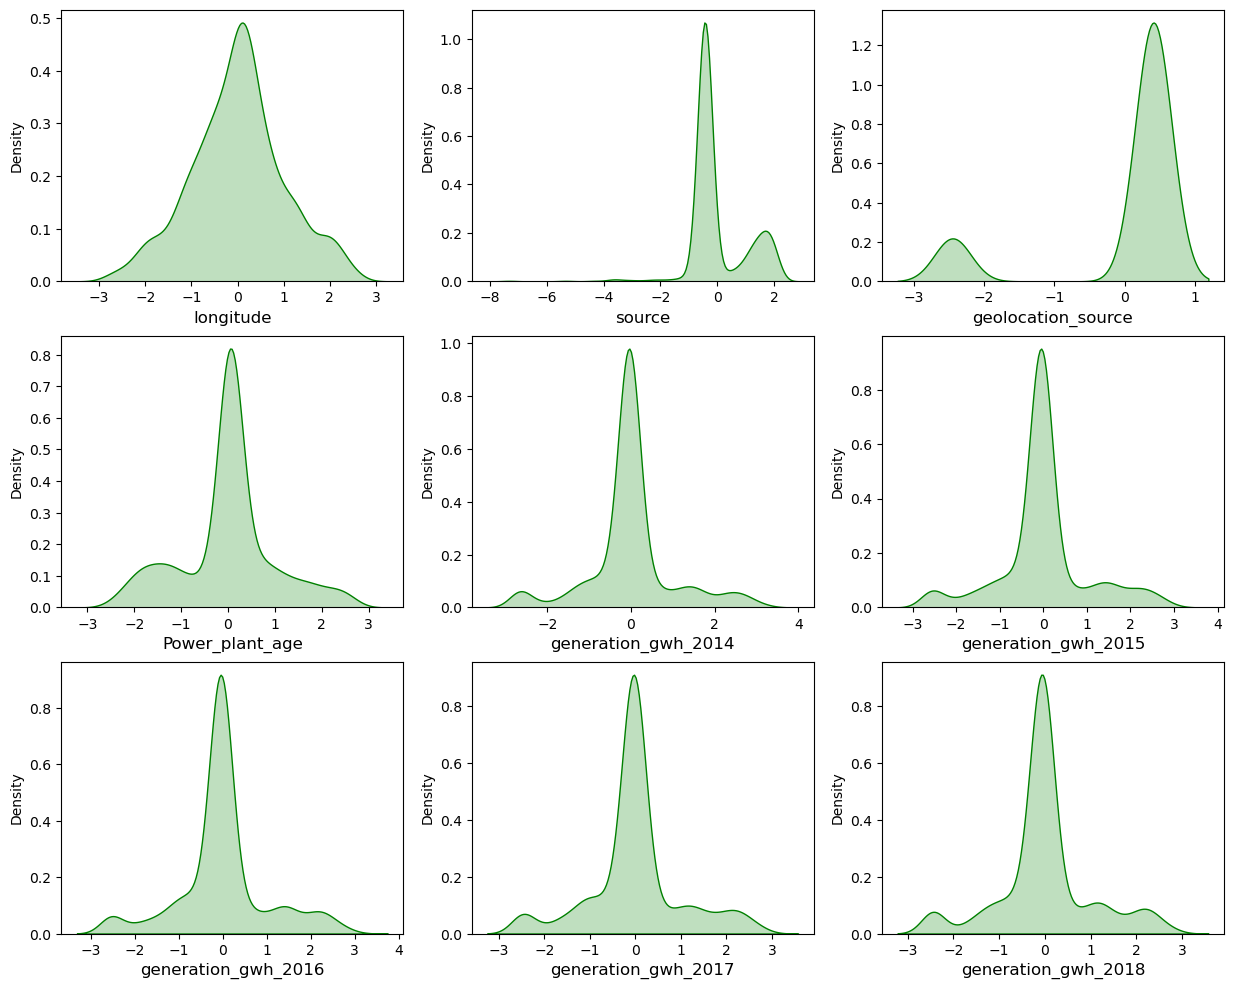

In [83]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(15,12), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been reduced in all the columns

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,fuel_type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.528061,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.115219
1,-0.499829,-0.975797,1.981788,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
2,-2.377759,1.605767,-0.488176,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
3,2.430594,-0.545536,-0.421677,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249922
4,1.261979,-0.975797,-0.421677,0.409046,1.426798,2.286603,2.276671,1.983083,2.347272,-1.781379
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.421677,0.409046,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.981715
847,0.421592,1.175506,1.158844,-2.451124,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
848,-0.224400,1.605767,-0.488176,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
849,-0.760624,-0.975797,0.856354,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142


So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

# Checking VIF (Variance Inflation Factor ) Values

In [85]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns

In [86]:
vif

,VIF values,features
0,1.293037,longitude
1,1.638495,fuel_type
2,1.297785,source
3,1.655988,geolocation_source
4,3.607149,generation_gwh_2014
5,6.180004,generation_gwh_2015
6,9.955353,generation_gwh_2016
7,9.747727,generation_gwh_2017
8,8.949310,generation_gwh_2018
9,1.107486,Power_plant_age


So here we can observe all the columns have VIF less than 10 .

Which means we are free from multicolinearity problem .

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
from sklearn.ensemble import RandomForestRegressor
maxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc  = r2_score(y_test, pred)
    if acc> maxAccu:
        maxAccu  =acc
        maxRS = i
print('maximum r2 score is', maxAccu, 'on random state', maxRS)        

maximum r2 score is 0.8734186620630051 on random state 297


So here we are getting the maximum R2 Score as 87% on the Random State 297

# Creating new train test split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  =0.30, random_state = maxRS)

In [90]:
x_train.shape

(595, 10)

In [91]:
x_test.shape

(256, 10)

In [92]:
y_train.shape

(595,)

In [93]:
y_test.shape

(256,)

# For Contineous data we use Regression Algorithms

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [95]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print("\n" ,"*"*25,"\n")
print("Here R2 score  for Decision Tree Regressor is:--", r2_score(y_test,predRFR)*100)
print("\n" ,"*"*50,"\n")

# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))
print("\n" ,"*"*25,"\n")
print("Here R2 score  for Decision Tree Regressor is:--", r2_score(y_test,predDTR)*100)
print("\n" ,"*"*50,"\n")


# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))
print("\n" ,"*"*25,"\n")
print("Here R2 score  for KNeighbor Regressor is:--", r2_score(y_test,predknn)*100)
print("\n" ,"*"*50,"\n")
              
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))  
print("\n" ,"*"*25,"\n")
print("Here R2 score  for Gradient Boosting Regressor is:--", r2_score(y_test,predGB)*100)
print("\n" ,"*"*50,"\n")

# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))
print("\n" ,"*"*25,"\n")
print("Here R2 score  for Bagging Regressor is:--", r2_score(y_test,predBR)*100)
print("\n" ,"*"*50,"\n")

LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('r2_score:', r2_score(y_test, pred_LR))
print('r2_Score on training data:', r2_score(y_train, pred_train)*100)
print('mean absolute error:-', mean_absolute_error(y_test, pred_LR))
print('mean square error:-', mean_squared_error(y_test, pred_LR))
print('root mean square error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))
print("\n" ,"*"*25,"\n")
print("Here R2 score  for Linear Regressor is:--", r2_score(y_test,pred_LR)*100)
print("\n" ,"*"*50,"\n")

R2_Score: 0.8613108803608345
MAE: 82.965439962499
MSE: 24065.994834924604
RNSE: 155.13218503883908

 ************************* 

Here R2 score  for Decision Tree Regressor is:-- 86.13108803608344

 ************************************************** 

R2_Score: 0.7437351849770049
MAE: 97.98
MSE: 44468.28800097655
RNSE: 210.87505305506517

 ************************* 

Here R2 score  for Decision Tree Regressor is:-- 74.37351849770049

 ************************************************** 

R2_Score: 0.7952518561805797
MAE: 98.89857734374999
MSE: 35528.87050143953
RNSE: 188.4910355996792

 ************************* 

Here R2 score  for KNeighbor Regressor is:-- 79.52518561805798

 ************************************************** 

R2_Score: 0.8398090787341637
MAE: 92.71187000763103
MSE: 27797.08959012485
RNSE: 166.72459203766206

 ************************* 

Here R2 score  for Gradient Boosting Regressor is:-- 83.98090787341637

 ************************************************** 

R2_Sco

In [96]:
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.datasets import make_regression

In [97]:
lasscv = LassoCV(alphas = None, max_iter = 10, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10, normalize=True)

In [98]:
alpha = lasscv.alpha_
alpha

0.1642841182553501

In [99]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1642841182553501)

In [100]:
lasso_reg.score(x_test,y_test)
print( "Lasso Accuracy is :- " ,lasso_reg.score(x_test,y_test)*100)

Lasso Accuracy is :-  67.65691149163513


In [101]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [102]:
ridgecv.alpha_

0.09099999999999998

In [103]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [104]:
ridge_model.score(x_test,y_test)
print( "Ridge Accuracy is :- " ,ridge_model.score(x_test,y_test)*100)

Ridge Accuracy is :-  67.63342452002664


means model is not overfit.

# Checking the cross validation score

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, pred_LR)-score.mean())*100)
print('\n','*'*100,'\n')

print("random forest cv ")
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, predRFR)-score.mean())*100)
print('\n','*'*100,'\n')


print("Decision tree regressor cv ")
score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, predDTR)-score.mean())*100)
print('\n','*'*100,'\n')

print("Gradient Boost cv ")
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, predGB)-score.mean())*100)
print('\n','*'*100,'\n')

print("BR cv ")
score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, predBR)-score.mean())*100)
print('\n','*'*100,'\n')

print("KNN cv ")
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("difference between r2score and cross validation score is---", (r2_score(y_test, predknn)-score.mean())*100)
print('\n','*'*100,'\n')

[0.47721401 0.52126145 0.47751355 0.57645256 0.56687602]
0.5238635205560962
difference between r2score and cross validation score is--- 15.245495476487248

 **************************************************************************************************** 

random forest cv 
[0.81443059 0.81123323 0.71882324 0.77646956 0.78259084]
0.7807094912376941
difference between r2score and cross validation score is--- 8.060138912314041

 **************************************************************************************************** 

Decision tree regressor cv 
[0.5862504  0.44269867 0.61323018 0.61873176 0.67506315]
0.5871948310006548
difference between r2score and cross validation score is--- 15.654035397635003

 **************************************************************************************************** 

Gradient Boost cv 
[0.78539069 0.78192171 0.70200856 0.71752669 0.76221477]
0.7498124829992585
difference between r2score and cross validation score is--- 8.999659573490515

 

From the above observation the difference between R2 score and the Cross Validation score we conclude that KNN as our best model.
Let's increase the accuracy of the model by using Hyper Parameter Tuning

# Hyper parameter tunning

In [107]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [108]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [110]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [112]:
final_model1= RandomForestRegressor(criterion='mae',max_depth=6, max_features='log2', n_estimators=200)
final_model1.fit(x_train,y_train)
pred = final_model1.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)



RMSE value: 155.13218503883908
R2_Score: 87.89393258929323


After tuning the model the R2 Score is increased by 1% and we are getting R2 Score as 87% for Random Forest Regressor. which is good.

In [114]:
import joblib
joblib.dump(final_model1,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [116]:
model1 = joblib.load("Global_Power_Plant_capacity_mw.pkl")
prediction = model1.predict(x_test)
prediction

array([ 451.6617475,   13.558225 ,   22.36405  ,   20.740725 ,
       1288.1375   ,   89.04755  , 1228.2945   ,  386.6834   ,
         32.363725 ,  607.8847925,  191.14301  ,   17.223075 ,
         19.136925 ,   19.211925 , 1568.48     , 1327.39     ,
        103.484225 ,   23.6738   ,   13.777225 ,   71.423    ,
       1246.5125   ,   85.1106775,   14.166475 ,   23.70305  ,
        115.928825 ,   13.312225 ,   21.6903   ,   21.6931   ,
         19.869175 ,   14.089975 ,  887.51035  ,   21.8431   ,
         22.40905  ,   21.8431   ,   19.070925 ,  256.513215 ,
         30.587975 , 1382.9845   ,  445.648425 ,   13.565475 ,
         19.338175 ,   19.136925 ,   16.650325 ,  363.17997  ,
         17.183075 ,   18.711925 ,   23.09805  ,   30.900975 ,
         67.80495  ,   23.04305  ,   88.7595   ,   22.9753   ,
         72.5845   ,   17.376075 ,   20.133175 ,   50.018475 ,
         19.041925 , 1265.4933   ,   22.1368   ,   17.285575 ,
       1340.315    ,   13.641225 ,  611.0033   ,  680.9

In [118]:
conclusion = pd.DataFrame([model1.predict(x_test)[:], y_test[:]], index = ["predicted", "original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
predicted,451.661747,13.558225,22.36405,20.740725,1288.1375,89.04755,1228.2945,386.6834,32.363725,607.884792,...,1354.1975,204.041585,1645.76,521.200337,249.520458,21.48885,77.512325,16.753825,19.070925,21.6303
original,705.000000,2.000000,20.00000,11.200000,1260.0000,139.20000,1000.0000,250.0000,3.750000,1000.000000,...,1200.0000,388.500000,2320.00,645.000000,120.000000,16.00000,130.000000,13.500000,24.000000,11.0000


And here we have saved the best model using joblib

# 2. Prediction for Fuel_Type

Separating the features and label variables into x_df and y_df

In [119]:
x_df = df1.drop("fuel_type", axis=1)
y_df = df1["fuel_type"]

# Agin Checking for Skewness with our 2nd Target variable

In [120]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns.

In [121]:
skew1 = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [122]:
x_df[skew1] = scaler.fit_transform(x_df[skew1].values)
x_df[skew1].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.115219
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249922
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.781379


In [123]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.018254
dtype: float64

we remove the skewness in to the columns. sinse source and geolocation source are the categorical data.

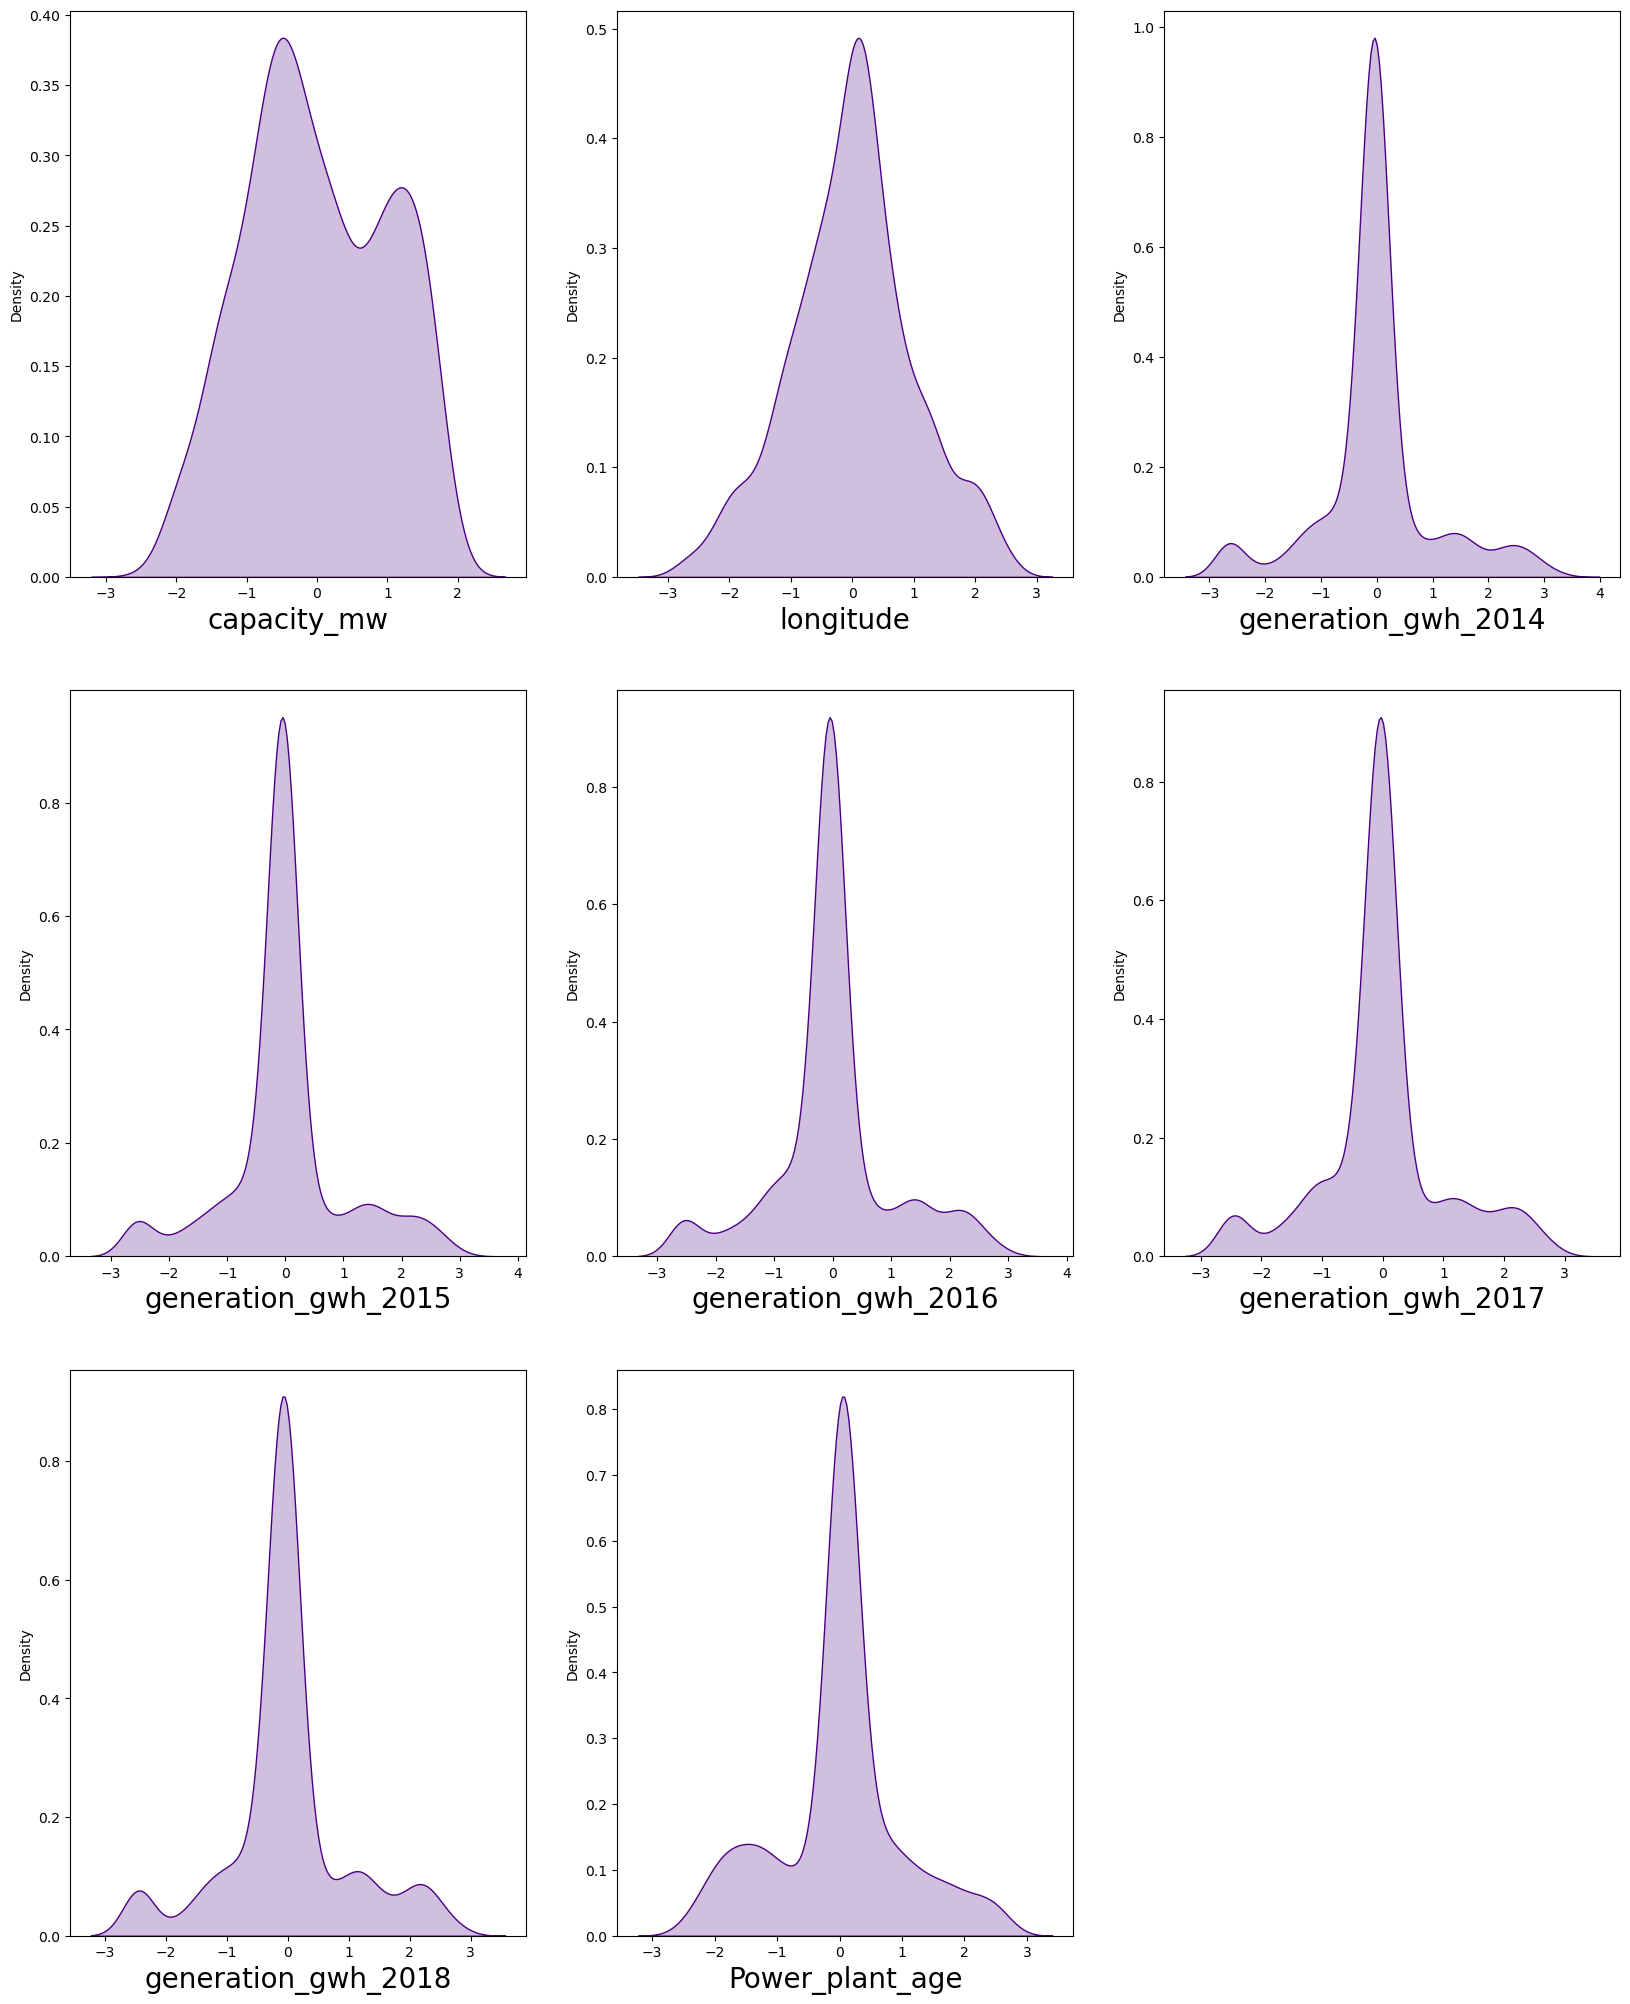

In [124]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skewness has been removed.

In [125]:
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.115219
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249922
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.781379
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.981715
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.052142


So here we have scaled the data using Standard Scalarization method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicolinearity issue exists in the data, so let's check the VIF value and if the columns have VIF > 10 then we can drop those columns

# Checking VIF values

In [128]:

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values, i) for i in range(len(x_df.columns))]
vif['Features'] = x_df.columns
vif

,VIF values,Features
0,1.815206,capacity_mw
1,1.193821,longitude
2,1.412944,source
3,1.591058,geolocation_source
4,3.626128,generation_gwh_2014
5,6.189749,generation_gwh_2015
6,9.959580,generation_gwh_2016
7,9.764905,generation_gwh_2017
8,8.960570,generation_gwh_2018
9,1.158794,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicolinearity problem

In [129]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: fuel_type, dtype: int64

So this is the multi classification problem.

In [130]:
# Oversampling

In [131]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [132]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: fuel_type, dtype: int64

# now build the model

Finding the best random state

In [133]:
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8968531468531469  on Random_state  105


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [135]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))
              

0.8811188811188811
[[77  2  0  0  0  1  0  0]
 [ 3 41  9  7  2  3  0  0]
 [ 3  5 53  6  3  3  2  0]
 [ 0  5  6 54  1  0  0  0]
 [ 0  0  1  1 67  0  0  0]
 [ 1  1  2  0  0 66  0  0]
 [ 1  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.76      0.63      0.69        65
           2       0.75      0.71      0.73        75
           3       0.79      0.82      0.81        66
           4       0.92      0.97      0.94        69
           5       0.90      0.94      0.92        70
           6       0.97      0.99      0.98        72
           7       1.00      1.00      1.00        75

    accuracy                           0.88       572
   macro avg       0.88      0.88      0.88       572
weighted avg       0.88      0.88      0.88       572



So here we are getting 88% accuracy using DTC
We can also observe th confusion matrx which contains True-Positive, False-Positive rate and False-Negative, True-Negative rate.

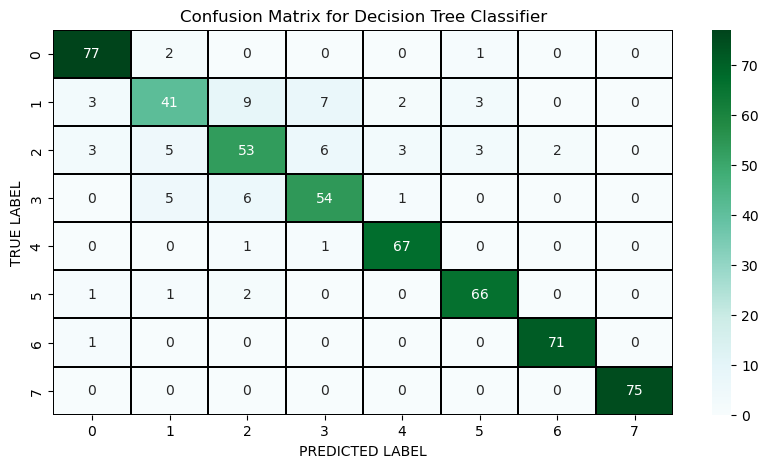

In [136]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [137]:
rfc = RandomForestClassifier()
rfc.fit(x_df_train,y_df_train)
predrfc = rfc.predict(x_df_test)

print(accuracy_score(y_df_test,predrfc))
print(confusion_matrix(y_df_test, predrfc))
print(classification_report(y_df_test,predrfc))

0.9178321678321678
[[80  0  0  0  0  0  0  0]
 [ 3 48  2  4  6  2  0  0]
 [ 1  2 62  2  3  5  0  0]
 [ 0  6  5 54  1  0  0  0]
 [ 0  1  1  0 67  0  0  0]
 [ 0  0  2  0  0 68  0  0]
 [ 1  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       0.84      0.74      0.79        65
           2       0.86      0.83      0.84        75
           3       0.90      0.82      0.86        66
           4       0.87      0.97      0.92        69
           5       0.91      0.97      0.94        70
           6       1.00      0.99      0.99        72
           7       1.00      1.00      1.00        75

    accuracy                           0.92       572
   macro avg       0.92      0.91      0.91       572
weighted avg       0.92      0.92      0.92       572



here we clearly observe taht theaccuracy of forest random classifier is 91%

In [138]:
lr = LogisticRegression()
lr.fit(x_df_train,y_df_train)
predlr = lr.predict(x_df_test)

print(accuracy_score(y_df_test,predlr))
print(confusion_matrix(y_df_test, predlr))
print(classification_report(y_df_test,predlr))

0.6765734265734266
[[67  0  0  0  0  1  0 12]
 [ 8 31  4  6 12  2  0  2]
 [ 5 13 18 15 12 10  0  2]
 [ 0 11  8 26  4  2  0 15]
 [ 0  2  0  0 66  1  0  0]
 [16  3  0  1  2 45  0  3]
 [ 2  2  0  0  0  0 68  0]
 [ 0  0  1  8  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        80
           1       0.50      0.48      0.49        65
           2       0.58      0.24      0.34        75
           3       0.46      0.39      0.43        66
           4       0.69      0.96      0.80        69
           5       0.74      0.64      0.69        70
           6       1.00      0.94      0.97        72
           7       0.66      0.88      0.75        75

    accuracy                           0.68       572
   macro avg       0.66      0.67      0.65       572
weighted avg       0.67      0.68      0.66       572



here we clearly observe that the accuracy of Logistic Regression is 70%

In [139]:
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.7814685314685315
[[67  0  0  0  0  0  0 13]
 [ 9 35  4  4  5  4  0  4]
 [ 2  8 35  9  8 11  0  2]
 [ 0  7 11 37  2  0  0  9]
 [ 0  1  0  0 68  0  0  0]
 [ 0  3  0  0  0 63  0  4]
 [ 1  3  0  0  0  0 68  0]
 [ 0  0  1  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        80
           1       0.61      0.54      0.57        65
           2       0.69      0.47      0.56        75
           3       0.74      0.56      0.64        66
           4       0.82      0.99      0.89        69
           5       0.81      0.90      0.85        70
           6       1.00      0.94      0.97        72
           7       0.70      0.99      0.82        75

    accuracy                           0.78       572
   macro avg       0.78      0.78      0.77       572
weighted avg       0.78      0.78      0.77       572



here we clearly observe that the accuracy of SVC is 77%

In [140]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_df_train,y_df_train)
predbc = bc.predict(x_df_test)

print(accuracy_score(y_df_test, predbc))
print(confusion_matrix(y_df_test, predbc))
print(classification_report(y_df_test, predbc))

0.8968531468531469
[[78  2  0  0  0  0  0  0]
 [ 3 49  3  4  4  2  0  0]
 [ 1  3 57  5  6  3  0  0]
 [ 0  5  9 50  2  0  0  0]
 [ 0  3  0  0 66  0  0  0]
 [ 1  1  1  0  0 67  0  0]
 [ 1  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        80
           1       0.78      0.75      0.77        65
           2       0.81      0.76      0.79        75
           3       0.85      0.76      0.80        66
           4       0.85      0.96      0.90        69
           5       0.93      0.96      0.94        70
           6       1.00      0.99      0.99        72
           7       1.00      1.00      1.00        75

    accuracy                           0.90       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.90      0.90      0.90       572



the accuracy of Bagging classifier is 90%

In [141]:
et = ExtraTreesClassifier()
et.fit(x_df_train,y_df_train)
predet = et.predict(x_df_test)

print(accuracy_score(y_df_test, predet))
print(confusion_matrix(y_df_test, predet))
print(classification_report(y_df_test, predet))

0.9230769230769231
[[80  0  0  0  0  0  0  0]
 [ 4 49  2  6  1  3  0  0]
 [ 1  3 65  2  0  4  0  0]
 [ 0  8  7 50  0  1  0  0]
 [ 0  1  0  1 67  0  0  0]
 [ 0  0  0  0  0 70  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       0.80      0.75      0.78        65
           2       0.88      0.87      0.87        75
           3       0.85      0.76      0.80        66
           4       0.99      0.97      0.98        69
           5       0.90      1.00      0.95        70
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        75

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.92      0.92      0.92       572



Accuarcy of this etc is 92%

the accuracy of Extra tress classifier is 92% but we dont know this accuracy is perfect. may be it is overffiting or underfitting model lets check

# class validation score

In [142]:
score = cross_val_score(rfc,x_df,y_df)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_df_test, predrfc)-score.mean())

[0.90813648 0.90551181 0.94488189 0.92388451 0.91315789]
0.9191145185799143
difference between accuracy score and cross validation score is--- -0.001282350747746519


In [143]:
score = cross_val_score(lr,x_df,y_df)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_df_test, predlr)-score.mean())

[0.70341207 0.71653543 0.69291339 0.70341207 0.68947368]
0.7011493300179583
difference between accuracy score and cross validation score is--- -0.024575903444531755


In [144]:
score = cross_val_score(svc,x_df,y_df)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_df_test, predsvc)-score.mean())

[0.79002625 0.80052493 0.82414698 0.77952756 0.77368421]
0.7935819864622184
difference between accuracy score and cross validation score is--- -0.01211345499368699


In [145]:
score = cross_val_score(bc,x_df,y_df)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_df_test, predbc)-score.mean())

[0.90026247 0.88713911 0.92125984 0.8976378  0.90789474]
0.9028387898881061
difference between accuracy score and cross validation score is--- -0.005985643034959187


In [146]:
score = cross_val_score(et,x_df,y_df)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_df_test, predet)-score.mean())

[0.91076115 0.91338583 0.94750656 0.92125984 0.92368421]
0.9233195192706175
difference between accuracy score and cross validation score is--- -0.00024259619369437768


1) RFC ----> 92 % accuracy

2) LR  ----> 71 % accuracy

3) SVC ----> 79 % accuracy


4) BC  ----> 89 % accuracy

5) ETC ----> 92 % accuracy

# Extra trees classifier is our best model

In [147]:
#Hyper tunning parameter

In [148]:
parameters = {'criterion': ['gini','entropy'], 
              'random_state': [10,50,1000], 
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1], 
              'n_estimators': [50,100,200,300]}

In [149]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [150]:
GCV.fit(x_df_train, y_df_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [151]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [152]:
final_model = ExtraTreesClassifier(criterion = 'gini',
 max_depth = 20,
 n_estimators = 50,
 n_jobs = -2,
 random_state = 50)

final_model.fit(x_df_train, y_df_train)
pred = final_model.predict(x_df_test)
acc = accuracy_score(y_df_test, pred)
print(acc*100)

92.3076923076923


Accuracy after hyper tunning is 91%

In [153]:
# saving the model

saving the model using .pkl and also predicting the saved model

In [154]:
import joblib
joblib.dump(final_model, "Global_pp_fuel_type.pkl")

['Global_pp_fuel_type.pkl']

In [155]:
model = joblib.load("Global_pp_fuel_type.pkl")
prediction = model.predict(x_df_test)
prediction

array([2, 4, 7, 0, 3, 3, 6, 4, 0, 4, 5, 0, 6, 5, 7, 0, 0, 3, 4, 3, 3, 7,
       4, 2, 5, 0, 4, 5, 2, 1, 6, 0, 0, 5, 3, 5, 2, 7, 6, 6, 4, 2, 4, 7,
       3, 1, 1, 5, 4, 4, 5, 2, 0, 1, 3, 2, 3, 4, 7, 6, 1, 4, 7, 6, 4, 7,
       7, 5, 2, 2, 7, 1, 2, 1, 2, 5, 0, 0, 5, 3, 7, 4, 1, 5, 7, 6, 0, 6,
       0, 0, 7, 6, 5, 2, 5, 3, 2, 6, 4, 1, 0, 0, 7, 1, 7, 0, 7, 4, 7, 0,
       6, 4, 2, 1, 1, 0, 7, 7, 5, 5, 2, 6, 0, 7, 3, 1, 3, 4, 0, 3, 5, 2,
       6, 0, 0, 0, 3, 5, 3, 0, 5, 4, 3, 4, 4, 6, 3, 4, 1, 0, 7, 1, 7, 1,
       7, 5, 0, 4, 3, 5, 5, 4, 6, 2, 0, 6, 2, 5, 2, 1, 7, 5, 4, 0, 1, 6,
       7, 7, 0, 5, 5, 4, 3, 1, 4, 6, 5, 5, 3, 6, 5, 7, 7, 1, 6, 5, 6, 3,
       0, 1, 3, 5, 1, 2, 7, 6, 4, 2, 6, 1, 5, 2, 3, 6, 0, 7, 0, 2, 4, 4,
       0, 6, 7, 7, 3, 3, 7, 7, 4, 3, 0, 3, 1, 6, 7, 0, 6, 5, 5, 5, 5, 6,
       6, 1, 5, 2, 5, 7, 4, 7, 5, 6, 1, 0, 0, 1, 5, 1, 3, 3, 5, 7, 6, 6,
       2, 0, 3, 3, 0, 7, 1, 7, 0, 0, 7, 6, 7, 1, 2, 1, 7, 0, 5, 5, 2, 1,
       7, 4, 1, 2, 3, 4, 3, 4, 6, 0, 3, 5, 1, 7, 2,

These are the predicted fuel type.It is always stored in an array format not in DataFrame so, you can convert it into DataFrame.

In [156]:
a= np.array(y_df_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

,predicted,original
0,2,2
1,4,4
2,7,7
3,0,0
4,3,3
...,...,...
567,2,2
568,1,1
569,0,0
570,0,1


In [157]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_df_test[:]], index = ["predicted", "original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
predicted,1,6,5,3,4,3,4,1,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original,2,4,7,0,3,3,6,4,0,4,...,7.0,0.0,3.0,6.0,2.0,2.0,1.0,0.0,1.0,0.0


Conclusion :-
- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 85%
- The final Accuracy  for the prediction of Fuel_Type of the power plant using Classification algorithm is = 92%